<a href="https://colab.research.google.com/github/Marlrero/AI_PrimaryEducation/blob/main/azml_taejun_minwoo_CNN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Keras CNN으로 패션 아이템 구분 - 과제

### 1. CNN 채널을 모두 4배 늘려 보세요. 어떤 결과를 얻나요?

기존 손실값 및 정확도 : 0.25 / 0.91

채널 4배 손실값 및 정확도 : 0.23 / 0.92

기존의 채널 수를 4배 늘리니 정확도와 로스율 모두 좋은 성능을 보임

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 128)       640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 256)       131328    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 256)         0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1605760   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

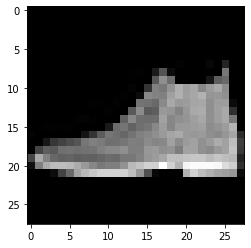

In [ ]:
import matplotlib.pyplot as plt
from time import time
import numpy as np
from keras.datasets import fashion_mnist # dataset
from keras.models import Sequential
from keras.utils import np_utils # One-hot encoding
from keras.layers import Conv2D, Dense, Flatten, InputLayer, MaxPool2D

# hyperparameter
MY_EPOCH = 10
MY_BATCH = 500


(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

# 훈련 데이터, 훈련 레이블, 검증 데이터, 검증 레이블
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

# 0 ~ 1 사이의 정규화(Normalization)
X_train = X_train / 255.0
X_test = X_test / 255.0

# 입력 데이터 모양 전환
# 60000*28*28 -> 60000*28*28*1(채널정보) 1:grayscale, 3:rgb
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# 라벨 데이터 One-hot encoding
Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

model = Sequential()

# 28*28*1
model.add(InputLayer(input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])))
model.add(Conv2D(filters=32 * 4, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2))
model.add(Conv2D(filters=64 * 4, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2))
# 7*7*64

model.add(Flatten())
# 7*7*64 = 3,136

model.add(Dense(units=128, activation='relu'))
# 파라미터 수: 3,136 * 128 + 128(bias) = 401,408 + 128 = 401,536

model.add(Dense(units=10, activation='softmax'))
# 파라미터 수: 128 * 10 + 10(bias) = 1,280 + 10 = 1,290
# 분류 문제이므로 softmax (확률값 출력)
# 회귀 문제는 항등함수 사용

model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
# 교차엔트로피 손실 값과 정확도를 넘겨줌

begin = time()
model.fit(x=X_train, y=Y_train, epochs=MY_EPOCH, batch_size=MY_BATCH, verbose=1)
end =time()
print("learning time: {:.2f}sec".format(end - begin))

score = model.evaluate(x=X_test, y=Y_test, verbose=1)
print("Total loss: {:.2f}".format(score[0]))
# mse인 경우, rmse로 바꾸려면 score[0]에다가 sqrt 하면 됨
print("Accuracy: {:.2f}".format(score[1]))


#                이미지숫자, width, height, channels
image = X_test[0].reshape(1, 28, 28, 1) # 4차원으로 (batch 정보 추가)
pred = model.predict(x=image)
print(np.argmax(pred, axis=1))

img = X_test[0].reshape(28, 28) # 채널 정보를 넣었으니(CNN), 이를 다시 빼줘야 한다.
img = (img * 255.0).astype(np.int) # 정규화 돌리기 (아까 255로 나눴음)
plt.imshow(img, cmap='gray')
plt.show()

### 2. 화소 데이터 [-1, 1] 정규화를 생략해 보세요. 어떤 결과를 얻나요?

정규화 전 손실값 및 정확도 : 0.25 / 0.91

정규화 후 손실값 및 정확도 : 0.32 / 0.90

손실값은 조금 상승하였고, 정확도는 조금 낮아졌다. 정규화한 것이 더 좋은 성능을 보인다.



학습용 입력 데이터: (60000, 28, 28)
학습용 출력 데이터: (60000,)
평가용 입력 데이터: (10000, 28, 28)
평가용 출력 데이터: (10000,)
학습용 입력 데이터: (60000, 28, 28, 1)
학습용 출력 데이터: (60000, 10)
평가용 입력 데이터: (10000, 28, 28, 1)
평가용 출력 데이터: (10000, 10)
CNN 요약
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 128)       640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 256)       131328    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 256)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_____________________________________

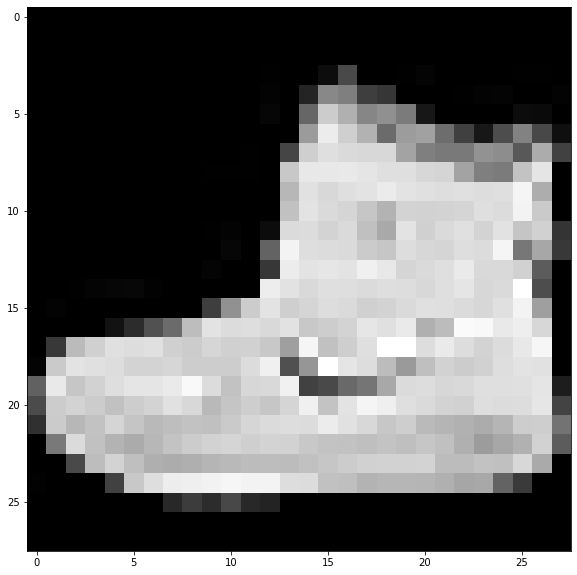

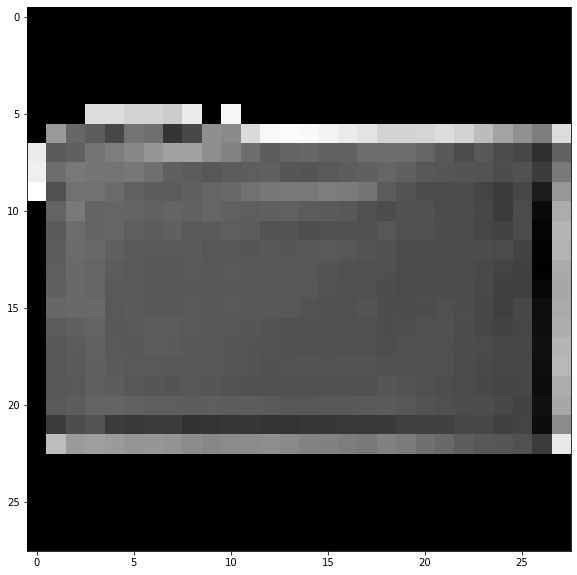

In [ ]:
# import 
import matplotlib.pyplot as plt
import numpy as np

from time import time
from keras.models import Sequential
from keras.utils import np_utils
from keras.datasets import fashion_mnist

from keras.layers import Flatten
from keras.layers import Dense, MaxPool2D
from keras.layers import Conv2D, InputLayer

#파라미터
MY_EPOCH=10
MY_BATCH=500

(X_train,Y_train),(X_test,Y_test)=fashion_mnist.load_data()

print('학습용 입력 데이터:',X_train.shape)
print('학습용 출력 데이터:',Y_train.shape)

print('평가용 입력 데이터:',X_test.shape)
print('평가용 출력 데이터:',Y_test.shape)

#데이터 샘플 출력
#print('학습용 데이터 첫번째 이미지 화소 정보')
#print(X_train[0])
plt.figure(figsize=(10,10))
plt.imshow(X_train[0],cmap='gray')
plt.show

#정규화 하지 않음
#X_train=X_train/255.0
#X_test=X_test/255.0

#데이터 모양 정보 전환
X_train=X_train.reshape(X_train.shape[0],28,28,1) 
X_test=X_test.reshape(X_test.shape[0],28,28 ,1)

#라벨 정보 수정
Y_train = np_utils.to_categorical(Y_train,10)
Y_test=np_utils.to_categorical(Y_test,10)

print('학습용 입력 데이터:',X_train.shape)
print('학습용 출력 데이터:',Y_train.shape)

print('평가용 입력 데이터:',X_test.shape)
print('평가용 출력 데이터:',Y_test.shape)

model=Sequential()
model.add(InputLayer(input_shape=(28,28,1)))

# 첫번째 합성곱 블럭
model.add(Conv2D(filters=32*4,
                 kernel_size=2,
                 padding='same',
                 activation='relu'))

model.add(MaxPool2D(pool_size=2))

# 두번째 합성곱 블럭
model.add(Conv2D(filters=64*4,
                 kernel_size=2,
                 padding='same',
                 activation='relu'))

model.add(MaxPool2D(pool_size=2))

# DNN 입성
model.add(Flatten())

model.add(Dense(units=128,
                activation='relu'))
model.add(Dense(units=10,
                activation='softmax'))

print('CNN 요약')
model.summary()

#학습 방식 설정
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

#CNN 학습
print('학습 시작')
begin=time()

model.fit(x=X_train,
          y=Y_train,
          epochs=MY_EPOCH,
          batch_size=MY_BATCH,
          verbose=1)

end=time()
print('총 학습시간 : {:.2f}초'.format(end-begin))

score = model.evaluate(x=X_test,y=Y_test,verbose=1)

print('최종 손실값: {:.2f}'.format(score[0]))
print('최종 정확도: {:.2f}'.format(score[1]))

#샘플 이미지
image=X_test[1234]
print(image.shape)
# batch 정보 추가
image=image.reshape(1,28,28,1)
pred=model.predict(image)
abc=X_train[1234].reshape(28,28)
abc=abc*255

print('평가용 첫번째 이미지 라벨: ',Y_test[1234])
print('CNN 예측값 (확률 10개):',pred)
print('CNN 예측 라벨:',np.argmax(pred,axis=1))


plt.figure(figsize=(10,10))
plt.imshow(abc,cmap='gray')

#### 3. 

GridSearchCV 를 통해 다른 조건은 같은 상태에서

optimizer를 ['SGD', 'RMSprop', 'Adagrad', 'Adam'] 4가지로 테스트했을 떄

RMSprop이 가장 좋은 성능을 보였습니다.

In [ ]:
# 추가
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
####################################


import matplotlib.pyplot as plt
from time import time
import numpy as np
from keras.datasets import fashion_mnist # dataset
from keras.models import Sequential
from keras.utils import np_utils # One-hot encoding
from keras.layers import Conv2D, Dense, Flatten, InputLayer, MaxPool2D

# hyperparameter
MY_EPOCH = 10
MY_BATCH = 500

(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

# 0 ~ 1 사이의 정규화(Normalization)
X_train = X_train / 255.0
X_test = X_test / 255.0

# 입력 데이터 모양 전환
# 60000*28*28 -> 60000*28*28*1(채널정보) 1:grayscale, 3:rgb
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# 라벨 데이터 One-hot encoding
Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

def create_model(optimizer='adam'):
    model = Sequential()
    model.add(InputLayer(input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])))
    model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
    model.add(MaxPool2D(pool_size=2))
    model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
    model.add(MaxPool2D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(units=128, activation='relu'))
    model.add(Dense(units=10, activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['acc'])
    return model

param_grid = [ 
        {'optimizer': ['SGD', 'RMSprop', 'Adagrad', 'Adam'], },
      ]

model = KerasClassifier(build_fn=create_model, epochs=MY_EPOCH, batch_size=MY_BATCH, verbose=0)
grid = GridSearchCV(estimator=model, param_grid=param_grid)

# 교차엔트로피 손실 값과 정확도를 넘겨줌
begin = time()
grid_result = grid.fit(X=X_train, y=Y_train)
#model.fit(x=X_train, y=Y_train, epochs=MY_EPOCH, batch_size=MY_BATCH, verbose=0)
end =time()
print("learning time: {:.2f}sec".format(end - begin))

print(grid.best_score_, grid.best_params_)
print("Test Score:", grid_result.score(X_test, Y_test))

learning time: 199.19sec
0.9014166593551636 {'optimizer': 'RMSprop'}
Test Score: 0.8925999999046326


4.

GridSearchCV 를 통해 3번에서 실행한 결과를 바탕으로 optimizer를 RMSprop으로 사용하고 다른 조건은 같을 때

batch_size: [250, 500, 1000, 2000, 3000], epochs: [5, 10, 25, 50] 총 20가지 조건으로 테스트 하였을 떄,
배치사이즈 500, 에포크25의 경우 가장 높은 성능을 보였습니다.

In [ ]:
# 추가
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
####################################


import matplotlib.pyplot as plt
from time import time
import numpy as np
from keras.datasets import fashion_mnist # dataset
from keras.models import Sequential
from keras.utils import np_utils # One-hot encoding
from keras.layers import Conv2D, Dense, Flatten, InputLayer, MaxPool2D

# hyperparameter
MY_EPOCH = 10
MY_BATCH = 500

(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

# 0 ~ 1 사이의 정규화(Normalization)
X_train = X_train / 255.0
X_test = X_test / 255.0

# 입력 데이터 모양 전환
# 60000*28*28 -> 60000*28*28*1(채널정보) 1:grayscale, 3:rgb
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# 라벨 데이터 One-hot encoding
Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

def create_model():
    model = Sequential()
    model.add(InputLayer(input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])))
    model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
    model.add(MaxPool2D(pool_size=2))
    model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
    model.add(MaxPool2D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(units=128, activation='relu'))
    model.add(Dense(units=10, activation='softmax'))
    model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['acc'])
    return model
  
param_grid = [ 
        {'batch_size': [250, 500, 1000, 2000, 3000], 'epochs': [5, 10, 25, 50], },
      ]

model = KerasClassifier(build_fn=create_model, verbose=0)
grid = GridSearchCV(estimator=model, param_grid=param_grid)

# 교차엔트로피 손실 값과 정확도를 넘겨줌
begin = time()
grid_result = grid.fit(X=X_train, y=Y_train)
#model.fit(x=X_train, y=Y_train, epochs=MY_EPOCH, batch_size=MY_BATCH, verbose=0)
end =time()
print("learning time: {:.2f}sec".format(end - begin))

print(grid.best_score_, grid.best_params_)

print("Test Score:", grid_result.score(X_test, Y_test))

learning time: 2052.68sec
0.9190499901771545 {'batch_size': 500, 'epochs': 25}
Test Score: 0.9144999980926514
